# Credibility Classification of Credit Card Clients 
### Group information:
Team number: 13  
Team members: Chester Wang, HanChen Wang, Qurat-ul-Ain Azim, Renee Kwon  

### $\href{https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients}{\text{Link to source}}$

### 1. Start by loading the necessary packages and training data set.

In [1]:
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport
from altair_data_server import data_server

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
headernames = [
    "ID",
    "LIMIT_BAL",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "default payment next month",
]
train_df = pd.read_csv("../data/split/train.csv", index_col=0, skiprows=1, names=headernames, encoding="utf-8")
test_df = pd.read_csv("../data/split/test.csv", index_col=0, skiprows=1, names=headernames, encoding="utf-8")

### 2. Basic Exploratory Data Analysis (EDA).  
Looking at the first and last rows of the training data. 


In [3]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
23637,23638,200000,2,2,2,46,0,0,0,0,...,136629,139504,142269,4342,4593,14955,5143,5166,5349,0
17169,17170,50000,2,3,2,26,0,0,0,0,...,26999,27748,28351,1700,2000,3000,1500,1200,1136,0
15955,15956,210000,2,1,2,30,0,0,0,0,...,5125,5732,9297,2000,2500,2000,1000,4000,4000,0
21486,21487,90000,2,1,2,27,0,0,2,0,...,50611,52764,55898,4000,0,3000,3000,4000,2043,0
12211,12212,60000,1,2,1,40,0,0,0,0,...,22564,24191,25778,1500,1500,2000,2000,2000,2000,1


In [4]:
train_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4426,4427,110000,2,2,1,28,0,0,0,0,...,45579,46843,48062,2027,2500,2000,2000,2000,1600,0
12695,12696,20000,2,3,2,38,-1,-1,2,0,...,3668,3508,5278,5015,0,0,3508,5278,780,0
3360,3361,150000,2,2,1,42,0,0,0,0,...,138016,144084,136604,6022,5022,5100,10500,0,10000,0
18283,18284,190000,1,1,1,54,0,0,0,0,...,192803,161324,156576,7154,7385,7520,5593,6000,5516,0
28564,28565,100000,2,1,1,36,-2,-2,-2,-2,...,15156,13920,2099,3514,3400,15156,13920,2099,15638,0


There are 24000 records in the training data set and no missing values in any rows or columns. 

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 23637 to 28564
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          24000 non-null  int64
 1   LIMIT_BAL                   24000 non-null  int64
 2   SEX                         24000 non-null  int64
 3   EDUCATION                   24000 non-null  int64
 4   MARRIAGE                    24000 non-null  int64
 5   AGE                         24000 non-null  int64
 6   PAY_0                       24000 non-null  int64
 7   PAY_2                       24000 non-null  int64
 8   PAY_3                       24000 non-null  int64
 9   PAY_4                       24000 non-null  int64
 10  PAY_5                       24000 non-null  int64
 11  PAY_6                       24000 non-null  int64
 12  BILL_AMT1                   24000 non-null  int64
 13  BILL_AMT2                   24000 non-null  int64
 14  BI

We have a binary feature, a few categorical features, and numerical features. 

In [6]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000
mean,15012.940792,167338.833333,1.602542,1.850875,1.551208,35.516833,-0.012708,-0.130250,-0.163958,-0.220458,...,43232.172750,40292.983542,38784.349208,5641.261958,5.873889e+03,5116.207083,4742.45800,4722.876500,5188.472375,0.221500
std,8649.751001,129933.404625,0.489382,0.788139,0.521430,9.216367,1.122875,1.196806,1.197450,1.168901,...,64301.779315,60868.199998,59615.313087,15971.770984,2.209639e+04,15582.324583,15175.92081,15032.940888,17817.373001,0.415265
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,7529.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2395.000000,1761.750000,1261.750000,1000.000000,8.357500e+02,390.750000,285.00000,264.000000,107.750000,0.000000
50%,15014.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18991.000000,18019.000000,16961.000000,2100.000000,2.012500e+03,1818.500000,1500.00000,1500.000000,1500.000000,0.000000
75%,22476.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54519.000000,50218.250000,48990.250000,5006.000000,5.000000e+03,4535.500000,4012.25000,4026.000000,4000.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,417588.000000,528897.00000,426529.000000,528666.000000,1.000000


### 3. Group features based on their types and make plots for each type.

In [7]:
train_df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [8]:
categorical_features = [
    "EDUCATION",
    "MARRIAGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
]

binary_features = ["SEX"]

drop = ["ID", "default payment next month"]

numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
]

#### Categorical features
`Education`: Ordinal feature. 1 = graduate school; 2 = university; 3 = high school; 4 = others.  
`Marital status`: 1 = married; 2 = single; 3 = others.  
`PAY_X`: Ordinal feature. The history of monthly payment tracked from April to September, 2005, as follows: PAY_1 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.   
#### Binary features
`Sex` is reported as a binary feature (1 = male; 2 = female).
#### Drop
`ID` duplicate column from the index. 
`default payment next month` is the target column.
#### Numeric features
`LIMIT_BAL`: The amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.   
`Age`: The age of the individual (years).   
`BILL_AMTX`: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.   
`PAY_AMTX`: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.



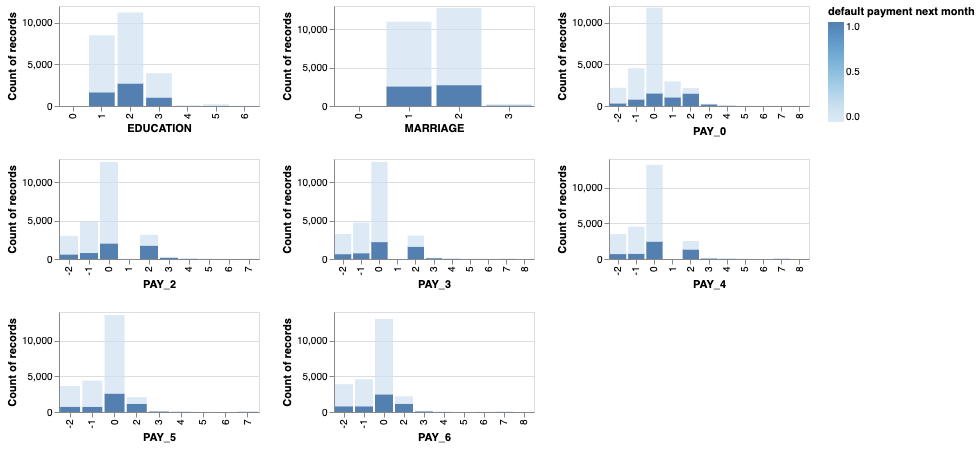

In [9]:
# Plotting categorical features
alt.Chart(train_df).mark_bar(opacity=0.7).encode(
    y=alt.Y("count()", title="Count of records"),
    x=alt.X(alt.repeat()),
    color=alt.Color("default payment next month"),
).properties(width=200, height=100).repeat(categorical_features, columns=3)

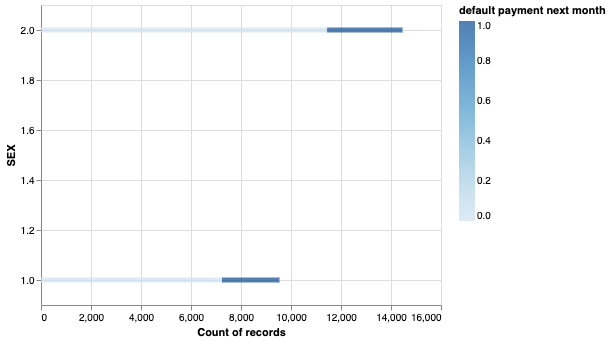

In [10]:
# Plotting the binary feature.
alt.Chart(train_df).mark_bar(opacity=0.7).encode(
    x=alt.X("count()", title="Count of records"),
    y=alt.Y("SEX", title="SEX"),
    color=alt.Color("default payment next month"),
)

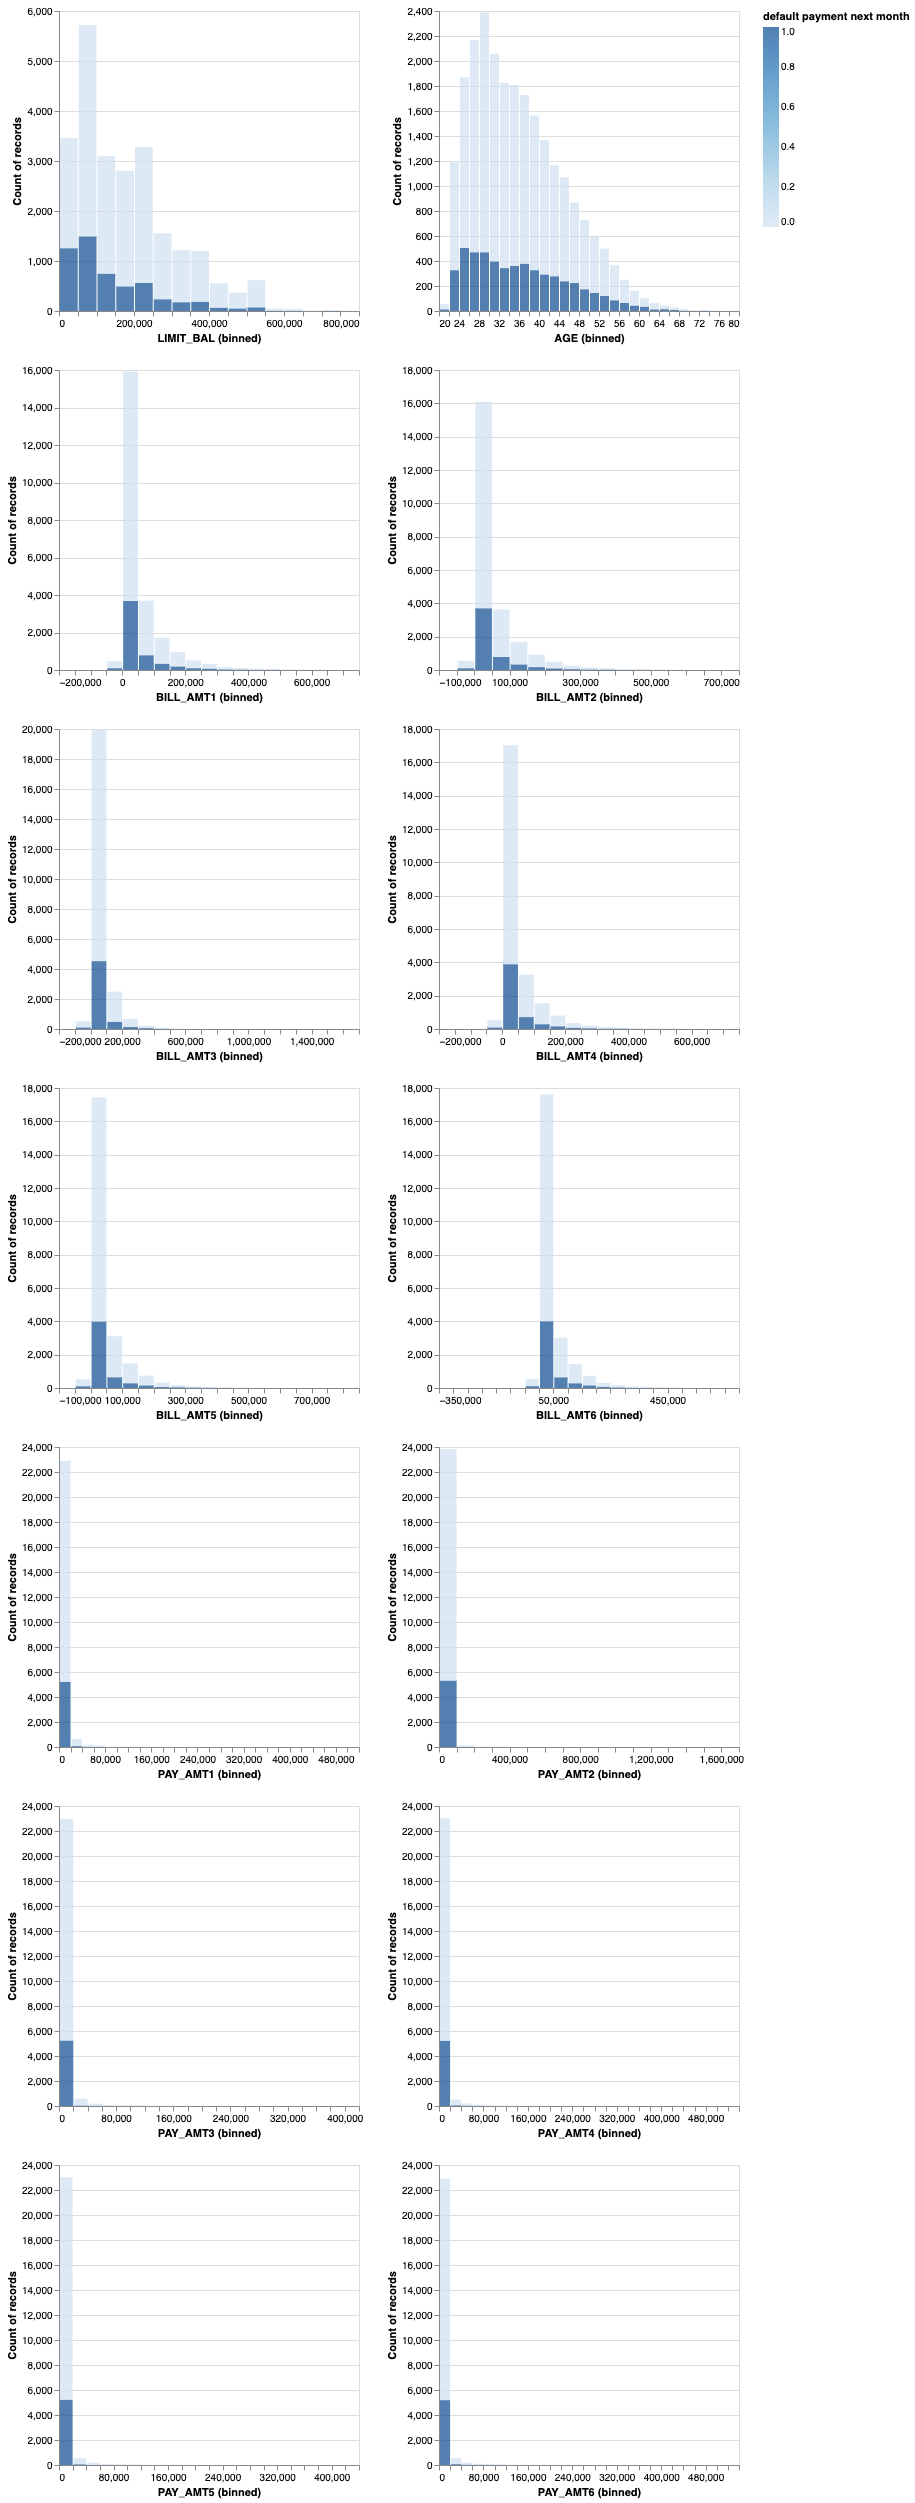

In [11]:
# Plotting numeric features.
alt.Chart(train_df).mark_bar(opacity=0.7).encode(
    x=alt.X(alt.repeat(), bin=alt.Bin(maxbins=30)),
    y=alt.Y("count()", title="Count of records"),
    color=alt.Color("default payment next month")
).properties(width=300, height=300).repeat(numeric_features, columns=2)

### 4. Looking at the correlation of the features. 

In [12]:
# Correlation matrix
train_df.corr('spearman').style.background_gradient()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.028541,0.019320,0.031970,-0.028712,0.025919,-0.021654,-0.002466,-0.006918,-0.000462,-0.013630,-0.004005,0.015631,0.013779,0.019907,0.035288,0.017408,0.022651,0.016291,0.057308,0.093810,0.020003,0.013567,0.043229,-0.011783
LIMIT_BAL,0.028541,1.000000,0.060286,-0.268328,-0.116244,0.187593,-0.297649,-0.342895,-0.332193,-0.307932,-0.282368,-0.260386,0.057878,0.054021,0.064744,0.077538,0.085668,0.092636,0.277853,0.284319,0.291616,0.287111,0.299269,0.319446,-0.171828
SEX,0.019320,0.060286,1.000000,0.018090,-0.031035,-0.093944,-0.057764,-0.080323,-0.073374,-0.065007,-0.055901,-0.048387,-0.047258,-0.046372,-0.035749,-0.025393,-0.017615,-0.014401,-0.007549,0.004275,0.020041,0.012868,0.012915,0.032551,-0.038160
EDUCATION,0.031970,-0.268328,0.018090,1.000000,-0.159241,0.155942,0.134109,0.172066,0.164510,0.154916,0.139180,0.122171,0.093723,0.091435,0.081583,0.068140,0.058647,0.053934,-0.046449,-0.047695,-0.046964,-0.046198,-0.050315,-0.053385,0.046859
MARRIAGE,-0.028712,-0.116244,-0.031035,-0.159241,1.000000,-0.465114,0.024195,0.044070,0.047767,0.045280,0.049074,0.045070,0.008447,0.009793,0.004113,0.006408,0.005600,0.007576,-0.002548,-0.018691,-0.010725,-0.015711,-0.010087,-0.017300,-0.021446
AGE,0.025919,0.187593,-0.093944,0.155942,-0.465114,1.000000,-0.069612,-0.089557,-0.086708,-0.082754,-0.085413,-0.077506,0.000556,0.002127,0.003077,-0.001428,-0.001636,-0.002938,0.035305,0.045740,0.034250,0.039959,0.035469,0.037594,0.000687
PAY_0,-0.021654,-0.297649,-0.057764,0.134109,0.024195,-0.069612,1.000000,0.629202,0.547767,0.515359,0.483787,0.461314,0.311954,0.327092,0.311171,0.304766,0.297252,0.288727,-0.104575,-0.068971,-0.060211,-0.038761,-0.028638,-0.045390,0.294860
PAY_2,-0.002466,-0.342895,-0.080323,0.172066,0.044070,-0.089557,0.629202,1.000000,0.797501,0.711599,0.672817,0.631828,0.571351,0.549666,0.515023,0.494483,0.476306,0.458399,0.016063,0.077223,0.081213,0.092237,0.096236,0.082007,0.211601
PAY_3,-0.006918,-0.332193,-0.073374,0.164510,0.047767,-0.086708,0.547767,0.797501,1.000000,0.801121,0.716187,0.668652,0.522569,0.586070,0.554868,0.528570,0.505081,0.483695,0.211223,0.030893,0.096653,0.115060,0.121913,0.098048,0.192430
PAY_4,-0.000462,-0.307932,-0.065007,0.154916,0.045280,-0.082754,0.515359,0.711599,0.801121,1.000000,0.822660,0.732282,0.509873,0.555031,0.617024,0.591064,0.560309,0.533406,0.181640,0.240351,0.066870,0.141151,0.160768,0.141098,0.173280


### 5. EDA with Pandas Profiling package. 

In [13]:
#profile = ProfileReport(train_df, title="Pandas Profiling Report")  # , minimal=True)
#profile.to_notebook_iframe()

## SECTION 2: Preprocessing and Model selection

In [23]:
train_df["PAY_0"].value_counts()

 0    11798
-1     4529
 1     2951
-2     2192
 2     2156
 3      267
 4       57
 5       20
 8       14
 6        8
 7        8
Name: PAY_0, dtype: int64

In [14]:
# 1. Create the column transformer / preprocessor
# Imports
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
]

binary_features = ["SEX"]

drop = ["ID"]

ordinal_features = [
    "EDUCATION",
    "MARRIAGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
]

# Create the column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (
        OrdinalEncoder(),
        ordinal_features,
    ),
    (
        OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse=False),
        binary_features,
    ),
    ("drop", drop),
)

# Show the preprocessor
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
                                  'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['SEX']),
                                ('drop', 'drop', ['ID'])])

In [15]:
# 2. Fit and transform on the training data
X_train = train_df.drop(columns=["default payment next month"])
X_test = test_df.drop(columns=["default payment next month"])
y_train = train_df["default payment next month"]
y_test = test_df["default payment next month"]

# This line nicely formats the feature names from `preprocessor.get_feature_names_out()`
# so that we can more easily use them below
preprocessor.verbose_feature_names_out = False
# Create a dataframe with the transformed features and column names
preprocessor.fit(X_train)

# transformed data
X_train_transformed = preprocessor.transform(X_train)
ordinal_enc_features = (
    preprocessor.named_transformers_["ordinalencoder"].get_feature_names_out().tolist()
)
ohe_features = (
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)

# Code to get all the feature names
feature_names = numeric_features + ordinal_enc_features + ohe_features

X_train_enc = pd.DataFrame(X_train_transformed, columns=feature_names)

# Show the transformed data
X_train_enc

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_AMT6,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_2
0,0.251374,1.137475,0.940451,1.011211,1.104860,1.452507,1.629966,1.735910,-0.081349,-0.057969,...,0.009010,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,-0.903088,-1.032623,-0.206290,-0.315498,-0.313130,-0.252458,-0.206105,-0.175015,-0.246769,-0.175321,...,-0.227450,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2,0.328338,-0.598603,-0.596770,-0.566714,-0.521376,-0.592642,-0.567812,-0.494637,-0.227986,-0.152693,...,-0.066704,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,-0.595231,-0.924118,-0.062191,0.004463,0.020429,0.114755,0.204890,0.287074,-0.102762,-0.265836,...,-0.176543,1.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0
4,-0.826124,0.486445,-0.438928,-0.408784,-0.370695,-0.321431,-0.264544,-0.218176,-0.259292,-0.197950,...,-0.178957,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-0.441303,-0.815613,-0.127294,-0.084612,-0.034217,0.036498,0.107612,0.155629,-0.226295,-0.152693,...,-0.201407,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
23996,-1.133980,0.269436,-0.529764,-0.532652,-0.560692,-0.615302,-0.604351,-0.562054,-0.039211,-0.265836,...,-0.247431,3.0,2.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0
23997,-0.133447,0.703455,1.196416,1.294876,1.298797,1.474077,1.705212,1.640882,0.023839,-0.038554,...,0.270053,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0
23998,0.174410,2.005514,2.102498,2.135467,2.158889,2.326124,1.988453,1.975903,0.094715,0.068389,...,0.018383,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0


In [16]:
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier


In [17]:
models = {
    "dummy": DummyClassifier(random_state=123),
    "Decision Tree": DecisionTreeClassifier(random_state=123),
    "KNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=123),
    "Ridge_cla": RidgeClassifier(random_state=123),
    "RandomForest_cla": RandomForestClassifier(random_state=123),
}

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

classification_metrics = ["accuracy", "precision", "recall", "f1"]

from collections import defaultdict

cross_val_results = defaultdict(list)
for model in models:
    cross_val_results[model].append(
        cross_validate(
            make_pipeline(preprocessor, models[model]),
            X_train,
            y_train,
            cv=5,
            return_train_score=True,
            scoring=classification_metrics,
        )
    )

/opt/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Pr

In [18]:
# code below modified from :https://stackoverflow.com/questions/13575090/
#              construct-pandas-dataframe-from-items-in-nested-dictionary
cross_val_results_df = (
    pd.concat(
        {
            key: pd.DataFrame(value[0]).agg(["mean", "std"])
            for key, value in cross_val_results.items()
        },
        axis=0,
    )
    .T.style.format(
        precision=2  # Pandas `.style` does not honor previous rounding via `.round()`
    )
    .background_gradient(
        axis=None,
        vmax=1,
        vmin=0,  # Color cells based on the entire matrix rather than row/column-wise
    )
)

cross_val_results_df

In [ ]:
# Selecting RandomForestClassifier for model hyperparameter optimization. 
from scipy.stats import loguniform
param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}
